<a href="https://colab.research.google.com/github/Manoj-Kumar-Paliviri/Digit-Classification/blob/main/Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gathering and preprocessing the dataset 

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/drive/MyDrive/EE/Digits'
CATEGORIES = ['0','1','2','3','4','5','6','7','8','9']

for i in CATEGORIES:
  index = CATEGORIES.index(i)         #label encoding
  path = os.path.join(DATADIR,i)      #creating path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(index)
    #plt.imshow(img_resized)
    #plt.show()
flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [ ]:
unique,count = np.unique(target,return_counts = True)

<BarContainer object of 10 artists>

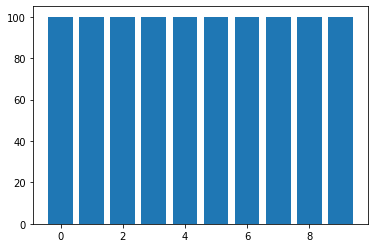

In [ ]:
plt.bar(unique,count)

Training and predicting the model

In [ ]:
x = flat_data
y = target

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model.score(x_test,y_test)

0.965

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)
print(y_test)

[6 0 2 0 2 2 3 6 6 1 9 0 0 9 9 1 5 8 6 3 4 5 0 3 1 4 2 1 5 2 4 8 1 2 4 8 0
 6 8 8 6 8 9 4 7 5 2 1 5 5 5 4 0 5 0 1 3 5 5 4 8 7 6 3 8 4 4 8 5 3 3 3 9 9
 4 5 2 2 7 4 1 1 0 7 0 5 1 1 0 3 2 2 6 8 7 7 7 6 6 8 2 9 7 6 9 5 9 5 2 5 6
 6 4 9 6 4 4 4 9 2 3 1 5 9 7 3 0 4 7 9 1 5 7 8 0 7 2 7 5 2 3 8 4 2 7 5 5 9
 0 8 9 8 3 7 5 7 9 0 9 3 3 2 0 6 6 5 8 1 4 4 0 8 0 3 2 9 9 6 3 6 0 6 9 6 0
 3 9 6 2 8 1 8 9 5 2 9 3 7 2 2]
[6 0 2 0 2 2 9 6 6 1 9 0 0 9 9 1 5 8 6 3 4 5 0 3 1 4 2 1 5 2 0 8 1 2 4 8 0
 6 8 8 6 6 9 4 7 5 2 1 5 5 5 4 0 5 0 1 3 5 5 4 8 7 6 3 8 4 4 8 5 3 3 3 9 9
 4 5 2 2 7 4 1 1 0 7 0 5 1 1 0 3 2 2 6 8 7 7 7 6 6 3 2 9 7 6 5 5 9 5 2 5 6
 6 4 9 6 4 4 4 5 2 3 1 5 9 7 3 0 4 7 9 1 5 7 8 0 7 2 7 5 2 3 8 4 2 7 5 5 9
 0 3 9 8 3 7 5 7 9 0 9 3 3 2 0 6 6 5 8 1 4 4 0 8 0 3 2 9 9 6 3 6 0 6 9 6 0
 3 9 6 2 8 1 8 9 5 2 9 3 7 2 2]


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[20,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 15,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 23,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 18,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 24,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 21,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 17,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 16,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 21]])

Demonstration of Confusion Matrix

Text(69.0, 0.5, 'Truth')

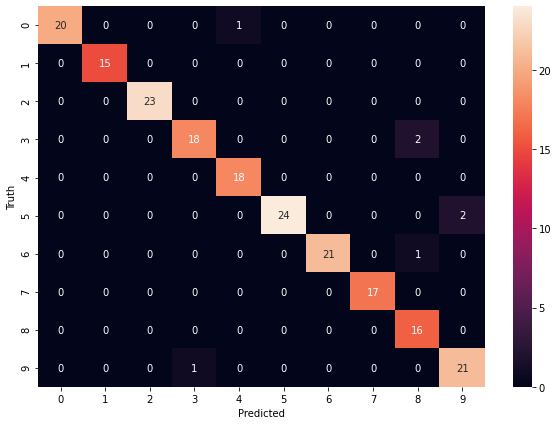

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(matrix,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Saving the model using joblib


In [ ]:
import joblib
joblib.dump(model,'Digit Classifier')

['Digit Classifier']

Deployment using Streamlit

In [ ]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

     |████████████████████████████████| 7.9 MB 15.4 MB/s 
     |████████████████████████████████| 75 kB 3.4 MB/s 
     |████████████████████████████████| 4.2 MB 49.3 MB/s 
     |████████████████████████████████| 111 kB 34.0 MB/s 
     |████████████████████████████████| 170 kB 44.8 MB/s 
     |████████████████████████████████| 122 kB 69.0 MB/s 
     |████████████████████████████████| 786 kB 49.0 MB/s 
     |████████████████████████████████| 368 kB 59.9 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.19 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.0.3 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.25.0 which is incompatib

In [ ]:
%%writefile app.py
import joblib
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
st.title('Digit Classfier using Machine Learning')
st.text('Upload the image of a digit to classify')
model = joblib.load('Digit Classifier')
uploaded_file = st.file_uploader("Choose an Image....",type = 'png')

if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption = "Image Uploaded")

if st.button('PREDICT'):
  st.write('Result....')
  CATEGORIES = ['0','1','2','3','4','5','6','7','8','9']
  flat_data = []
  img = np.array(img)
  img_resized = resize(img,(150,150,3)) 
  flat_data.append(img_resized.flatten())
  flat_data = np.array(flat_data)
  y_out = model.predict(flat_data)
  y_out = CATEGORIES[y_out[0]]
  st.title(f'Predicted output:{y_out}')
  q = model.predict_proba(flat_data)
  for index,item in enumerate(CATEGORIES):                  #prints the probability of all the categories
    st.write(f'{item} : {q[0][index]*100}%')

Overwriting app.py


In [ ]:
import skimage
print(skimage.__version__)

0.16.2
